# 🏀 NBA Analysis Notebook 🏀

## 🚀 Setup

In [16]:
## 📊 Setup

import duckdb
import matplotlib.pyplot as plt
import numpy as np


# Connect to the DuckDB database
conn = duckdb.connect(database='./duckdb.db')

## 🌟 Analysis 1: Top Teams by Performance Metrics

In [19]:
# Get the top 10 teams by average points and all-star appearances
top_teams_by_average_points = conn.execute("""              
    SELECT 
        team_name,
        avg_points
    FROM teams_appg
    ORDER BY avg_points DESC
    LIMIT 10
""").df()

top_teams_by_all_star_appearances = conn.execute("""              
    SELECT 
        team_name,
        total_all_star_appearances
    FROM teams_asa
    ORDER BY total_all_star_appearances DESC
    LIMIT 10
""").df()

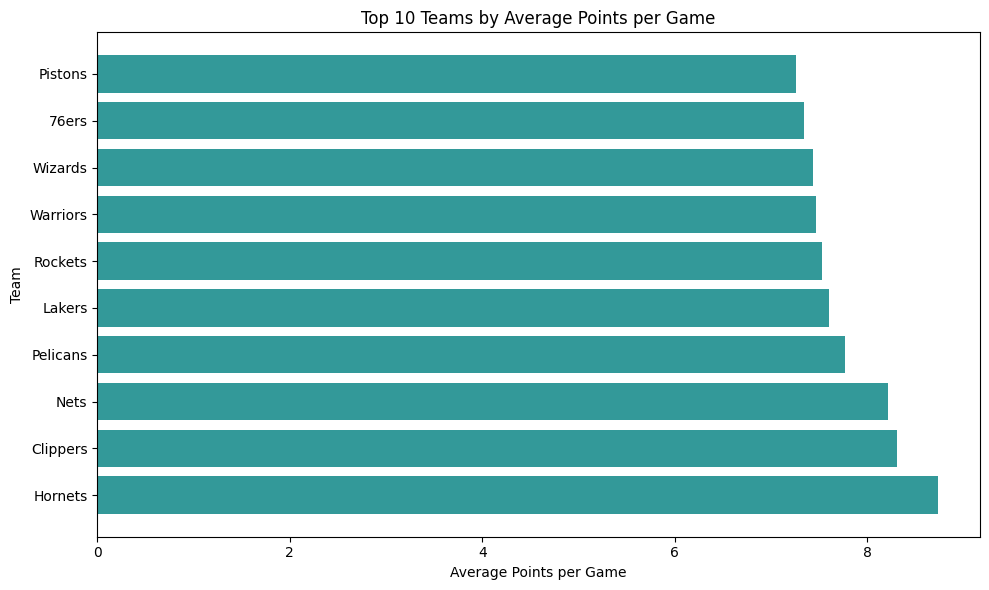

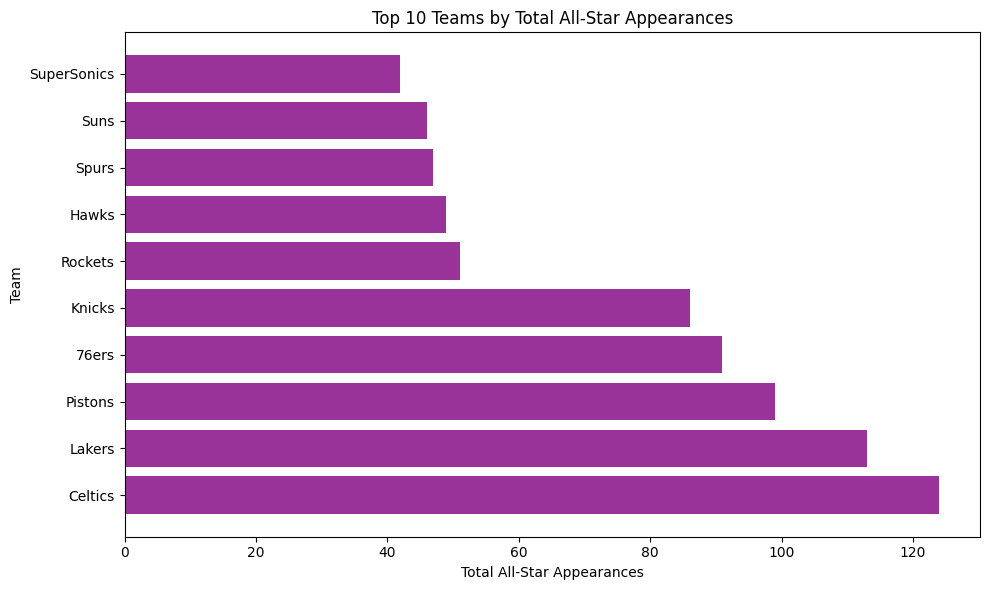

In [20]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_teams_by_average_points['team_name'], top_teams_by_average_points['avg_points'], color='teal', alpha=0.8)
plt.xlabel('Average Points per Game')
plt.ylabel('Team')
plt.title('Top 10 Teams by Average Points per Game')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  
plt.barh(top_teams_by_all_star_appearances['team_name'], top_teams_by_all_star_appearances['total_all_star_appearances'], color='purple', alpha=0.8)
plt.xlabel('Total All-Star Appearances')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total All-Star Appearances')
plt.tight_layout()
plt.show()

## 🏅 Analysis 2: Top Players by Performance Metrics

In [21]:
top_players = conn.execute("""
    SELECT 
        ppg.full_name AS player,
        ppg.points_per_game,
        appg.assists_per_game,
        rpg.rebounds_per_game
    FROM players_ppg ppg
    JOIN players_appg appg ON ppg.full_name = appg.full_name
    JOIN players_rpg rpg ON ppg.full_name = rpg.full_name
    ORDER BY ppg.points_per_game DESC
    LIMIT 10
""").df()

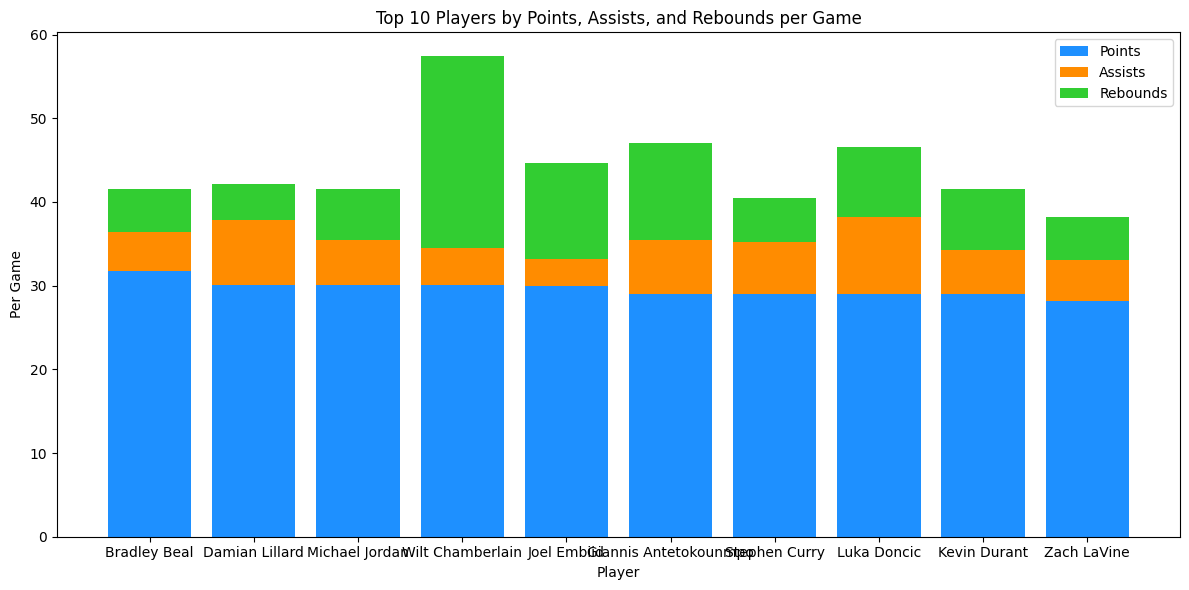

In [22]:
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.8
players = top_players['player']
points = top_players['points_per_game']
assists = top_players['assists_per_game']
rebounds = top_players['rebounds_per_game']

plt.bar(players, points, bar_width, color='dodgerblue', label='Points')
plt.bar(players, assists, bar_width, bottom=points, color='darkorange', label='Assists')
plt.bar(players, rebounds, bar_width, bottom=points+assists, color='limegreen', label='Rebounds')

plt.xlabel('Player')  
plt.ylabel('Per Game')
plt.title('Top 10 Players by Points, Assists, and Rebounds per Game')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
player_salary_performance = conn.execute("""
    SELECT
        full_name,
        salary,
        pts AS points_per_game,  
        ast AS assists_per_game,
        reb AS rebounds_per_game
    FROM player_salary_info 
    WHERE salary IS NOT NULL
""").df()


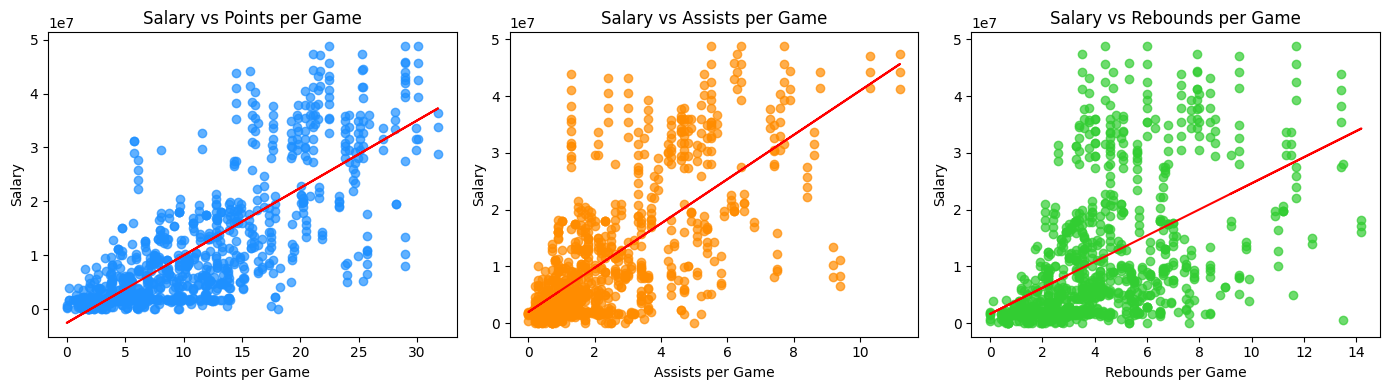

In [25]:

# Create scatter plots with linear regression lines
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.scatter(player_salary_performance['points_per_game'], player_salary_performance['salary'], color='dodgerblue', alpha=0.7)
m, b = np.polyfit(player_salary_performance['points_per_game'], player_salary_performance['salary'], 1)
plt.plot(player_salary_performance['points_per_game'], m*player_salary_performance['points_per_game'] + b, color='red')
plt.xlabel('Points per Game')
plt.ylabel('Salary')
plt.title('Salary vs Points per Game')

plt.subplot(132)
plt.scatter(player_salary_performance['assists_per_game'], player_salary_performance['salary'], color='darkorange', alpha=0.7)
m, b = np.polyfit(player_salary_performance['assists_per_game'], player_salary_performance['salary'], 1)
plt.plot(player_salary_performance['assists_per_game'], m*player_salary_performance['assists_per_game'] + b, color='red')
plt.xlabel('Assists per Game')
plt.ylabel('Salary')  
plt.title('Salary vs Assists per Game')

plt.subplot(133)
plt.scatter(player_salary_performance['rebounds_per_game'], player_salary_performance['salary'], color='limegreen', alpha=0.7)
m, b = np.polyfit(player_salary_performance['rebounds_per_game'], player_salary_performance['salary'], 1)
plt.plot(player_salary_performance['rebounds_per_game'], m*player_salary_performance['rebounds_per_game'] + b, color='red')
plt.xlabel('Rebounds per Game')
plt.ylabel('Salary')
plt.title('Salary vs Rebounds per Game')  

plt.tight_layout()
plt.show()